In [1]:
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import random
import os
import matplotlib.pyplot as plt
import tensorflow as tf

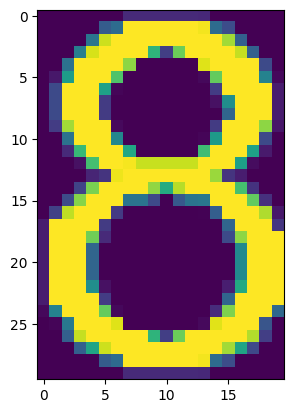

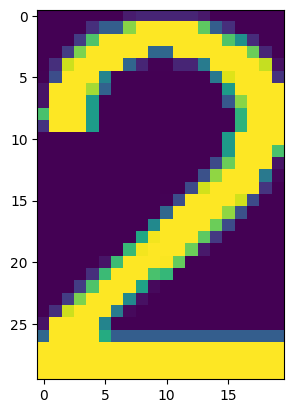

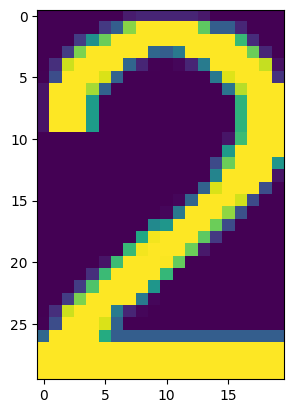

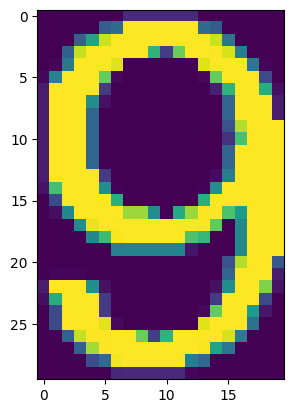

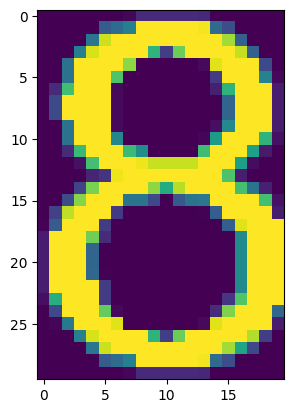

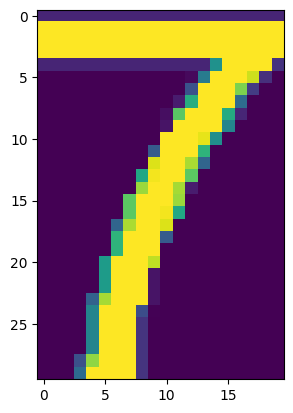

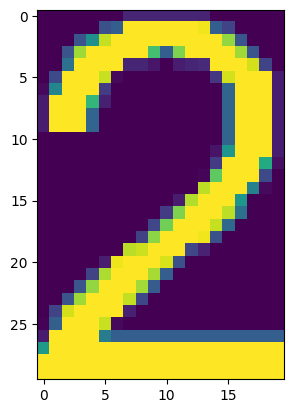

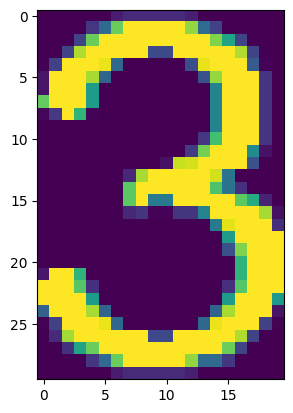

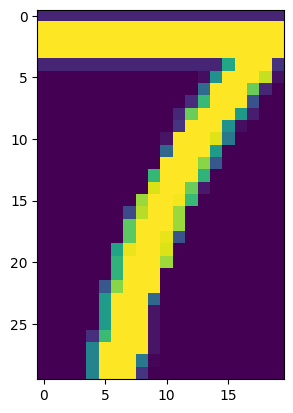

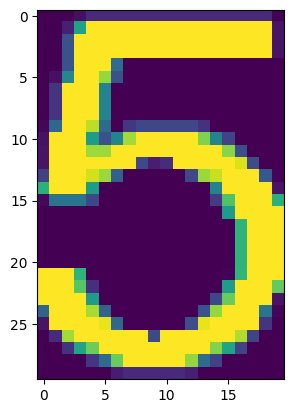

In [5]:
image = cv2.imread("numbers.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

blurred_image = cv2.GaussianBlur(binary_image, (5, 5), 0)
edged_image = cv2.Canny(blurred_image, 30, 150)

contours, _ = cv2.findContours(edged_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
test_sample=[]
for c in contours:
    column, row, width, height = cv2.boundingRect(c)
    sub_boards = cv2.resize(binary_image[row : row + height, column : column + width], (20, 30))
    plt.figure()
    plt.imshow(sub_boards)
    sub_boards=sub_boards/255
    test_sample.append(sub_boards.flatten())
test_sample = tf.Variable(np.array(test_sample, dtype=np.float32))


In [6]:
W = tf.Variable(np.load("../W.npy"))
V = tf.Variable(np.load("../V.npy"))

b1 = tf.Variable(np.load("../b1.npy"))
b2 = tf.Variable(np.load("../b2.npy"))

[8, 2, 2, 9, 8, 7, 2, 3, 7, 5]


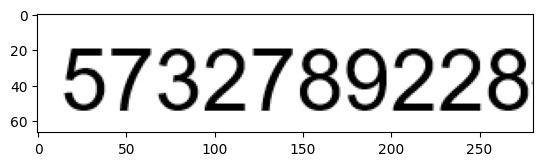

In [7]:
with tf.GradientTape() as tape:
    tape.watch([W, b1, V, b2])
    h = tf.nn.sigmoid(tf.matmul(test_sample, W) + b1)
    logits = tf.matmul(h, V) + b2
    y = tf.nn.softmax(logits)

res=[]
for p in y.numpy():
    res.append(p.argmax())
print(res)
plt.imshow(image)